### Описание проекта ###

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Цель исследования.** Выяснить способ наибольшего увеличения выручки.

**Задачи исследования:**

1) Загрузить данные и подготовить к анализу;

2) Расставить гипотезы в приоритетном порядке; Примените фреймворк ICE, RICE для приоритизации гипотез, указать, как изменилась приоритизация гипотез при применении RICE вместо ICE

3) Провести А/В тест, а именно: Построить график кумулятивной выручки по группам. Построить график кумулятивного среднего чека по группам. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. Построить график кумулятивного среднего количества заказов на посетителя по группам. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Построить точечный график количества заказов по пользователям. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. Построить точечный график стоимостей заказов. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Принять решение по результатам теста и объясните его.

**Исходные данные:** Три датасета. Файл hypothesis.csv хранит информацию о гипотезах, orders.csv — информацию о заказах, а visitors.csv — информацию о посетителях по группам.

**Структура проекта:**

[Открытие и предобработка данных](#step1)

[Часть 1. Функции для расчета и анализа LTV, ROI, удержания и конверсии](#step2)

* [Расчет ICE](#step2_1)
* [Расчет RICE](#step2_2)

[Часть 2. Анализ A/B теста](#step3)

* [График кумулятивной выручки и среднего чека](#step3_1)
* [Точечный график количества и стоимости заказа](#step3_2)
* [Расчёт статистической значимости по "сырым" данным](#step3_3)
* [Расчёт статистической значимости по "очищенным" данным](#step3_4)

[Вывод](#step4)


## Открытие и предобработка данных ##

<a id='step1'></a>

На данном этапе было проведено открытие и предобработка данных. Пропусков и дубликатов выявлено не было.

In [1]:
from scipy import stats as st
import numpy as np
import math as mth
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import os
%matplotlib inline

In [2]:
def read_file(file_name):
    path1 = os.path.join('/datasets', file_name)
    path2 = os.path.join(file_name)
    if os.path.exists(path1):
        data = pd.read_csv(path1)
        return data
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
        return data
    else:
        print('File is not found')

In [3]:
hypothesis = read_file('hypothesis.csv')
visitors = read_file('visitors.csv')
orders = read_file('orders.csv')

In [4]:
def information(df):
    display(df.head())
    print(' ')
    print('Информация о таблице')
    print(' ')
    display(df.info())  
    print(' ')
    print('Пропущенные значения')
    print(' ')
    display(df.isna().sum())
    print(' ')
    print('Дубликаты')
    print(' ')
    display(df.duplicated().sum())
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [5]:
for table in [hypothesis, orders, visitors]:
    information(table)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


 
Информация о таблице
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

 
Пропущенные значения
 


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

 
Дубликаты
 


0

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


 
Информация о таблице
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

 
Пропущенные значения
 


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

 
Дубликаты
 


0

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 
Информация о таблице
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

 
Пропущенные значения
 


date        0
group       0
visitors    0
dtype: int64

 
Дубликаты
 


0

Проведем проверку данных на наличие пользователей, которые одновременно находятся в обеих группах.

Таких пользователей оказалось 58, в реальном исследовании таких пользователей следовало бы исключить, но в рамках нашей задачи оставим, так как по ним уже получены агрегированные значения


In [6]:
orders_a = orders.loc[orders['group']=='A']
orders_b = orders.loc[orders['group']=='B']
orders_cross = orders_a.loc[orders_a['visitorid'].isin(orders_b['visitorid'])]
orders_cross = orders_cross[['visitorid', 'group']].drop_duplicates()
display(orders_cross.head(5))
orders_cross.shape

,visitorid,group
2,4069496402,A
26,199603092,A
29,3803269165,A
33,2378935119,A
41,237748145,A


(58, 2)

In [7]:
orders.loc[orders['visitorid']==4069496402]

,transactionid,visitorid,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
1070,1473132782,4069496402,2019-08-12,640,B


## Часть 1. Приоритизация гипотез ##

<a id='step2'></a>

В данной части мы применили фреймворки ICE, RICE для приоритизации гипотез и установили, как изменилась приоритизация гипотез при применении RICE вместо ICE.

Наиболее приоритетные гипотезы по показателю **ICE** стали:

1. Запустить акцию, дающую скидку на товар в день рождения. Данная гипотеза имеет очень высокий импакт и уверенность, так как каждому человеку будет приятно получить подарок. Имеет средний показатель затрат, так как может занять много времени для того, чтобы найти клиентов, которые совершат покупку в свой день рождения.
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Высокий импакт и уверенность в гипотезе, так как мы привлекаем новых пользователей. Затраты немного выше, привлечение трафика стоит денег.
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Данная гипотеза имеет высокий имппакт и уверенность, так как это новая и для кого-то полезная услуга. Умеренные затраты на ее тестирование.

Наиболее приоритетные гипотезы по показателю **RICE** стали:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. По данному показателю гипотеза переместилась на 1-ое место, так как имеет всеобщий охват, рассылка будет предложена каждому пользователю.
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Данной гипотезы не было в предыдущем рейтинге, так как не имеет большого импакта. При этом она будет иметь широкий охват и небольшие затраты.
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Данная гипотеза переместилась на 3-е место, так как имеет маленький охват(увеличение пользователей на 30% - охват 3)

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" набрала наибольший рейтинг RICE, потому что имеет всеобъемлющий охват(reach), коснется каждого пользователя. Гипотеза о скидке в день рождения, напротив, имеет наименьший охват, поэтому ее RICE не высокий.

Выделим гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" как приоритетную.

In [8]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Необходимо провести расчеты ICE, RICE по следующим формулам

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [9]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'] / hypothesis['efforts']).round(1)

Наиболее приоритетные гипотезы по показателю **ICE** стали:

<a id='step2_1'></a>

1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [10]:
ice_hypotesis = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice_hypotesis

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


In [11]:
ice_hypotesis['hypothesis'].head(3).to_list()

['Запустить акцию, дающую скидку на товар в день рождения',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок']

Наиболее приоритетные гипотезы по показателю **RICE** стали:

<a id='step2_2'></a>

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

In [12]:
rice_hypotesis = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
rice_hypotesis

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [13]:
rice_hypotesis['hypothesis'].head(3).to_list()

['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей']

## Часть 2. Анализ A/B-теста ##

<a id='step3'></a>

**Выводы:**

* Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
* По "очищенным" данным в среднем в группе В заказов больше на 17.3%, чем в группе А;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График относительного прироста конверсии говорит о том, что группа B лучше группы A: имеет тенденцию к росту, либо зафиксировался около среднего значения;
* График отношения среднего чека группы В к А сильно колеблется, однозначных выводов о нем сделать нельзя.

По результатам анализа тест следует остановить и признать его успешным. Результаты группы В лучше группы А.

In [14]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Подготовим данные для построения графика коммулятивной выручки по группам

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Построим график кумулятивной выручки по группам.

<a id='step3_1'></a>

В первой половине месяца группы шли равномерно, и В немного опережала, но во второй половине в группе В был резкий скачок - была совершена крупная сделка, в связи с чем она сильно выбилась по отношению к А.

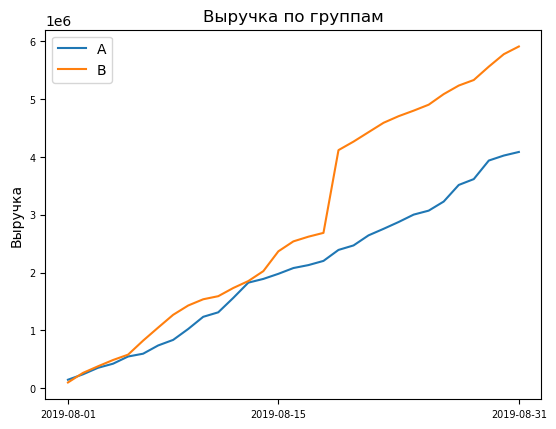

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Выручка по группам')
plt.ylabel('Выручка')

plt.xticks(['2019-08-01', '2019-08-15', '2019-08-31'], fontsize=7)
plt.yticks(fontsize=7)
plt.legend()
plt.show()

Построим график среднего чека по группам.

В первой половине месяца график колебался, группы периодически сменяли друг друга в статусе лидера, но во второй половине группа В снова совершила резкий скачок, средний чек вырос на 3000, но после аномальной сделки начал падать.

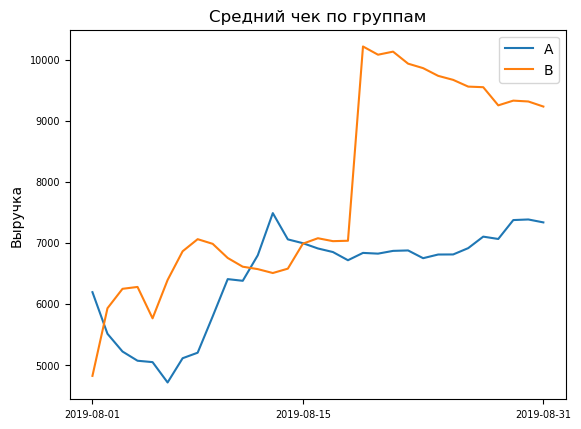

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Средний чек по группам')
plt.ylabel('Выручка')

plt.xticks(['2019-08-01', '2019-08-15', '2019-08-31'], fontsize=7)
plt.yticks(fontsize=7)
plt.legend()
plt.show()

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Как мы видим, практически весь период группа В опережала А. Также были резкий скачки в несколько дат, в это время совершались аномальные покупки

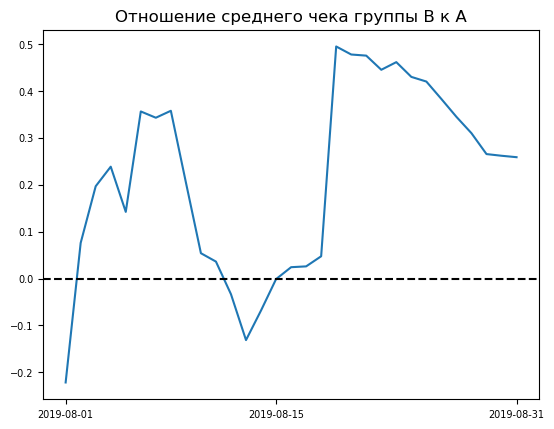

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Отношение среднего чека группы В к А')
plt.xticks(['2019-08-01', '2019-08-15', '2019-08-31'], fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Построим график кумулятивной конверсии по группам.

Практически весь период группа В немного опережала А.

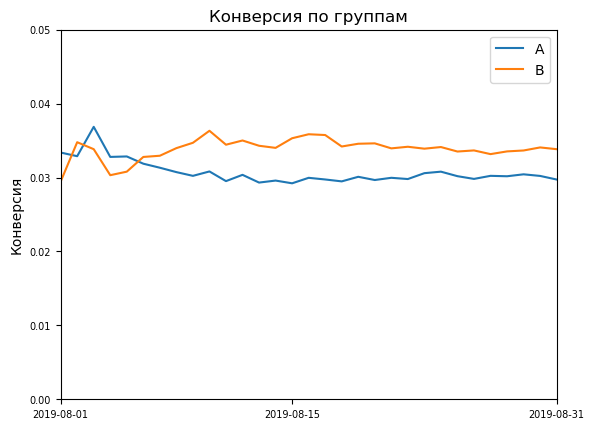

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Конверсия по группам')
plt.ylabel('Конверсия')
plt.xticks(['2019-08-01', '2019-08-15', '2019-08-31'], fontsize=7)
plt.yticks(fontsize=7)
plt.legend()
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])
plt.show()

Построим график относительного прироста конверсии группы В относительно группы А.

Практически весь период группа В по конверсии опережала группу А и колебалась в промежутке 10-20%. 

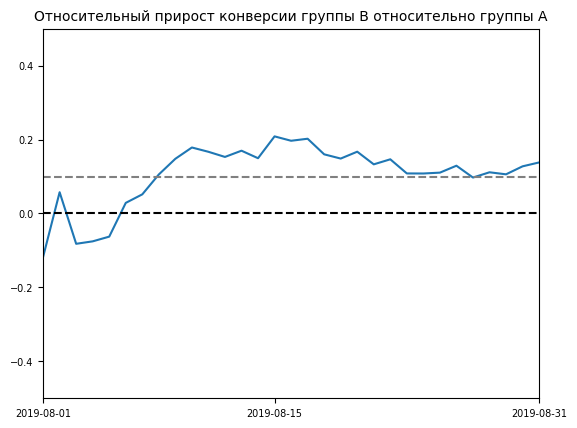

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A', fontsize=10)
plt.xticks(['2019-08-01', '2019-08-15', '2019-08-31'], fontsize=7)
plt.yticks(fontsize=7)
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.show()

Построим точечный график количества заказов по пользователям.

<a id='step3_2'></a>

Количество пользователей, совершивших более 2-х заказов, не много, но есть небольшое количество клиентов, совершивших 3 сделки. Необходимо рассчитать перцентили для определения аномальных значений.

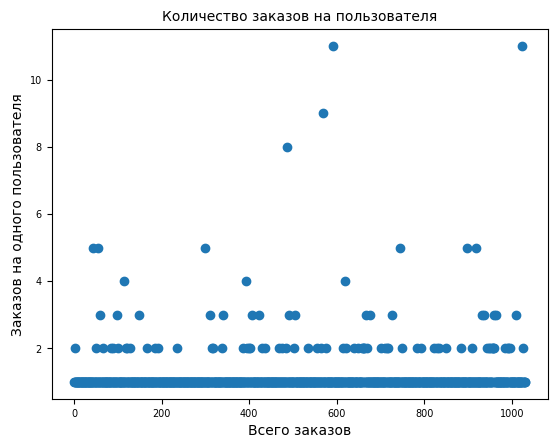

In [23]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на пользователя', fontsize=10)
plt.xlabel('Всего заказов')
plt.ylabel('Заказов на одного пользователя')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя

95% пользователей совершили не более 2-х заказов

1% пользователей совершили более 4-х заказов

Возьмем 5% порог значений, а именно 2 заказа.

In [24]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Построим точечный график стоимостей заказов.

На графике присутсвует всего лишь несколько выбросов, но один из них настолько крупный, что не дает возможности точно оценить величину среднего заказа, он превосходит его более чем в 10 раз. Для точной оценки необходимо рассчитать перцентили.

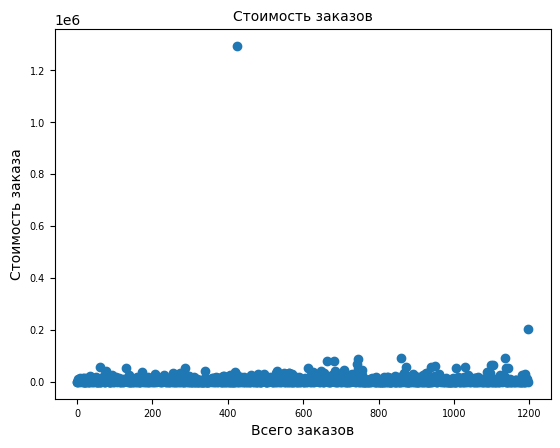

In [25]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов', fontsize=10)
plt.xlabel('Всего заказов')
plt.ylabel('Стоимость заказа')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Рассчитаем перцентили для стоимости заказа.

95% заказов не превышают 28000, а 99% - 58233.

Используем 95% интервал.

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]    



[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

Сформулируем гипотезы:

<a id='step3_3'></a>

Нулевая: различий в среднем количестве заказов между группами нет по "сырым". Альтернативная: различия в среднем между группами есть.

p-value меньше 5%, есть статичтическая значимость, нулевую гипотезу отвергаем.

В среднем в группе В количество заказов больше на 13,8%.

In [28]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

p-value больше 5%, значит нулевую гипотезу мы отвергнуть не можем

Разница между средними довольно большая, средний чек в группе В больше на 25,9%

In [29]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Подготовим "очищенные" данные, лишенные выбросов.

74 строки имеют аномальные значения

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitorid, Length: 74, dtype: int64

Применим статистический критерий Манна-Уитни к полученным выборкам:

Нулевая гипотеза: различий в среднем количестве заказов между группами нет по "сырым". Альтернативная: различия в среднем между группами есть.

<a id='step3_4'></a>

p-value по-прежнему меньше 5%, статистическая значимость снова присутствует, нулевую гипотезу отвергаем.

Разница между средним количеством заказов выросла, по "очищенным" данным в группе В заказов больше на 17,3%. 

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


Проведем аналогичную процедуру для среднего чека.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

p-value по-прежнему больше 5%, значит нулевую гипотезу мы отвергнуть не можем

Разница между средними чеками по группам после "очищения" сильно изменилась и теперь не значительна. Средний чек в группе А больше на 2%, чем в группе В.

In [32]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Тест следует остановить и признать победу группы В

## Вывод ##

<a id='step4'></a>

* Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" выбрана как приоритетная.
* Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
* По "очищенным" данным в среднем в группе В заказов больше на 17.3%, чем в группе А;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График относительного прироста конверсии говорит о том, что группа B лучше группы A: имеет тенденцию к росту, либо зафиксировался около среднего значения;
* График отношения среднего чека группы В к А сильно колеблется, однозначных выводов о нем сделать нельзя.

**По результатам анализа тест следует остановить и признать его успешным. Результаты группы В лучше группы А.** Выбранная гипотеза рекомендуется к введению.